# STOCK PICKING 2 - 
# THE FUTURE IS NOT WHAT IT USED TO BE 

What is the correlation between sharpe ratio and cumulative return? 

Let's pick 

  * __long_positions__: the best 10 securities by cumulative return and the best 10 securities by sharpe ratio
  * __short_positions__: the worst 10 securities by cumulative return and the worst 10 securities by sharpe ratio
    

__What is the probability that the top/bottom 3 securities by cumulative return are included in this set?__

Let's assume as __universe the top 1500 “tradeable” stocks by 200-day average dollar volume__, capped at 30% of equities allocated to any single sector. A stock is considered “tradeable” if it meets the following criteria:

* the stock must be the primary share class for its company.
* the company issuing the stock must have known market capitalization.
* the stock must not be a depository receipt.
* the stock must not be traded over the counter (OTC).
* the stock must not be for a limited partnership.
* the stock must have a known previous-day close price.
* the stock must have had nonzero volume on the previous trading day

In [79]:
from quantopian.interactive.data.sentdex import sentiment 
from quantopian.pipeline.filters.morningstar import Q1500US
from quantopian.pipeline import Pipeline 
from quantopian.research import run_pipeline
import matplotlib.pyplot as plt 
import datetime 
import numpy as np
import pandas as pd

In [80]:
def fill_missing_values(df_data):
    """Fill missing values in data frame, in place."""
    df_data.fillna(method='ffill',inplace=True)
    df_data.fillna(method='backfill',inplace=True)
    return df_data

def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # Note: Returned DataFrame must have the same number of rows
    daily_returns = (df / df.shift(1)) - 1 
    daily_returns.ix[0,:] = 0 
    return daily_returns

def cumulative_returns(df):
    return df/df.ix[0,:] - 1 

def sharpe_ratio(df,sample_freq='d',risk_free_rate=0.0):
    
    sr = (df - risk_free_rate).mean() / df.std()
    
    if sample_freq == 'd':
        sr = sr * np.sqrt(252)
    elif sample_freq == 'w':
        sr = sr * np.sqrt(52)
    elif sample_freq == 'm':
        sr = sr * np.sqrt(12)
    else:
        raise Exception('unkown sample frequency :'+str(sample_freq))
        
    sr = sr.replace(np.inf, np.nan)
        
    return sr

sharpe = (data[stock].returns() / np.std(data[stock].returns())) * np.sqrt(365.25)  

# 3 MONTHS - Let's see the correlation cumulative return / sharpe ratio in the past 3 months 

In [81]:
DELTA = 30*3

In [82]:
start_date = (datetime.date.today() - datetime.timedelta(DELTA)).strftime("%m-%d-%Y")
print("start_date",start_date)

('start_date', '01-15-2017')


In [83]:
end_date = (datetime.date.today()).strftime("%m-%d-%Y")
print("end_date",end_date)

('end_date', '04-15-2017')


In [84]:
def make_pipeline():
    universe = (Q1500US())
    pipe = Pipeline( screen = universe)
    return pipe

result = run_pipeline(pipeline=make_pipeline(),start_date=start_date,end_date=end_date)
result.head()

Empty DataFrame
Columns: []
Index: [(2017-01-17 00:00:00+00:00, Equity(24 [AAPL])), (2017-01-17 00:00:00+00:00, Equity(52 [ABM])), (2017-01-17 00:00:00+00:00, Equity(53 [ABMD])), (2017-01-17 00:00:00+00:00, Equity(62 [ABT])), (2017-01-17 00:00:00+00:00, Equity(67 [ADSK]))]

In [85]:
assets = result.index.levels[1].unique()
print("# assets:",len(assets))

('# assets:', 1553)


In [86]:
pricing = fill_missing_values(get_pricing(assets,start_date=start_date,end_date=end_date,fields='close_price'))

In [87]:
pricing.head()

,Equity(24 [AAPL]),Equity(52 [ABM]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),Equity(161 [AEP]),...,Equity(49760 [WBT]),Equity(49881 [LSXM_A]),Equity(49891 [MGP]),Equity(50138 [PI]),Equity(50181 [FHB]),Equity(50288 [TTD]),Equity(50357 [ARCH]),Equity(50533 [CNDT]),Equity(50535 [PK]),Equity(50595 [BIVV])
2017-01-17 00:00:00+00:00,119.472,39.631,113.97,40.641,78.62,97.499,108.00,71.887,44.368,63.231,...,18.885,35.19,24.705,31.71,31.811,28.96,73.00,14.19,25.927,44.05
2017-01-18 00:00:00+00:00,119.472,39.661,113.23,40.482,79.72,97.788,108.79,72.613,44.622,62.884,...,18.970,35.70,24.636,30.65,32.020,29.03,73.05,14.52,25.750,44.05
2017-01-19 00:00:00+00:00,119.253,39.222,112.19,40.154,79.98,97.130,109.79,72.046,44.180,62.121,...,18.860,35.30,24.449,30.43,31.722,29.00,72.25,14.50,25.582,43.32
2017-01-20 00:00:00+00:00,119.482,39.501,111.73,40.204,81.67,97.220,110.73,72.484,44.408,62.319,...,18.850,35.55,24.594,31.12,32.396,29.27,73.45,14.44,25.602,42.83
2017-01-23 00:00:00+00:00,119.572,39.302,111.57,40.115,81.54,95.806,110.98,72.385,44.398,62.141,...,18.750,35.27,24.676,33.63,32.427,29.81,73.95,14.56,25.582,42.20


In [88]:
type(pricing)

<class 'pandas.core.frame.DataFrame'>

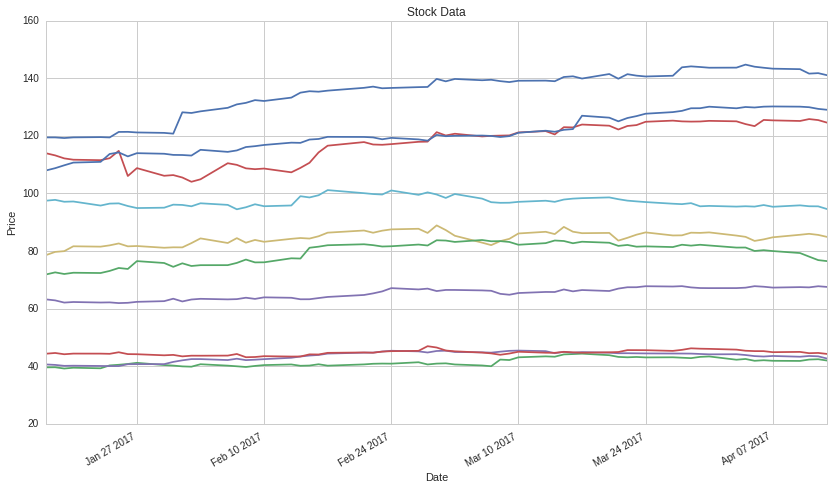

In [89]:
pricing = pricing.sort_index()
ax = pricing.ix[:,0:10].plot(title="Stock Data")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend_.remove()
plt.show()

## Cumulative returns

In [90]:
cr = cumulative_returns(pricing)
cr = cr.sort_index()
cr.head()

,Equity(24 [AAPL]),Equity(52 [ABM]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),Equity(161 [AEP]),...,Equity(49760 [WBT]),Equity(49881 [LSXM_A]),Equity(49891 [MGP]),Equity(50138 [PI]),Equity(50181 [FHB]),Equity(50288 [TTD]),Equity(50357 [ARCH]),Equity(50533 [CNDT]),Equity(50535 [PK]),Equity(50595 [BIVV])
2017-01-17 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-18 00:00:00+00:00,0.000000,0.000757,-0.006493,-0.003912,0.013991,0.002964,0.007315,0.010099,0.005725,-0.005488,...,0.004501,0.014493,-0.002793,-0.033428,0.006570,0.002417,0.000685,0.023256,-0.006827,0.000000
2017-01-19 00:00:00+00:00,-0.001833,-0.010320,-0.015618,-0.011983,0.017298,-0.003785,0.016574,0.002212,-0.004237,-0.017555,...,-0.001324,0.003126,-0.010362,-0.040366,-0.002798,0.001381,-0.010274,0.021846,-0.013307,-0.016572
2017-01-20 00:00:00+00:00,0.000084,-0.003280,-0.019654,-0.010753,0.038794,-0.002862,0.025278,0.008305,0.000902,-0.014423,...,-0.001853,0.010230,-0.004493,-0.018606,0.018390,0.010704,0.006164,0.017618,-0.012535,-0.027696
2017-01-23 00:00:00+00:00,0.000837,-0.008302,-0.021058,-0.012943,0.037141,-0.017364,0.027593,0.006928,0.000676,-0.017238,...,-0.007149,0.002273,-0.001174,0.060549,0.019364,0.029351,0.013014,0.026075,-0.013307,-0.041998


In [91]:
cr.max(axis=1).head()

2017-01-17 00:00:00+00:00    0.000000
2017-01-18 00:00:00+00:00    0.325215
2017-01-19 00:00:00+00:00    0.326648
2017-01-20 00:00:00+00:00    0.325215
2017-01-23 00:00:00+00:00    0.323782
Freq: C, dtype: float64

In [92]:
cr.idxmax(axis=1).head()

2017-01-17 00:00:00+00:00       Equity(24 [AAPL])
2017-01-18 00:00:00+00:00    Equity(49001 [CLCD])
2017-01-19 00:00:00+00:00    Equity(49001 [CLCD])
2017-01-20 00:00:00+00:00    Equity(49001 [CLCD])
2017-01-23 00:00:00+00:00    Equity(49001 [CLCD])
Freq: C, dtype: object

Focusing on the last day only, we want to know the ranking. 

In [93]:
cr.ix[ (cr.shape[0]-1) ,:].sort_values(ascending=False).head()

Equity(44989 [ESPR])    2.487936
Equity(6104 [FIZZ])     0.844430
Equity(47169 [KITE])    0.733038
Equity(38633 [ASPS])    0.613662
Equity(43599 [RH])      0.567333
Name: 2017-04-13 00:00:00+00:00, dtype: float64

In [94]:
cr.ix[ (cr.shape[0]-1) ,:].sort_values(ascending=False).tail()

Equity(7203 [TLRD])    -0.424691
Equity(2069 [FTR])     -0.430417
Equity(26865 [BBG])    -0.444828
Equity(6330 [RAD])     -0.477509
Equity(47848 [FMSA])   -0.482043
Name: 2017-04-13 00:00:00+00:00, dtype: float64

__Best performance__

In [95]:
cr.idxmax(axis=1)[cr.idxmax(axis=1).shape[0]-1]

Equity(44989, symbol=u'ESPR', asset_name=u'ESPERION THERAPEUTICS INC', exchange=u'NASDAQ', start_date=Timestamp('2013-06-25 00:00:00+0000', tz='UTC'), end_date=Timestamp('2017-04-17 00:00:00+0000', tz='UTC'), first_traded=None, auto_close_date=Timestamp('2017-04-20 00:00:00+0000', tz='UTC'), exchange_full=u'NASDAQ GLOBAL MARKET')

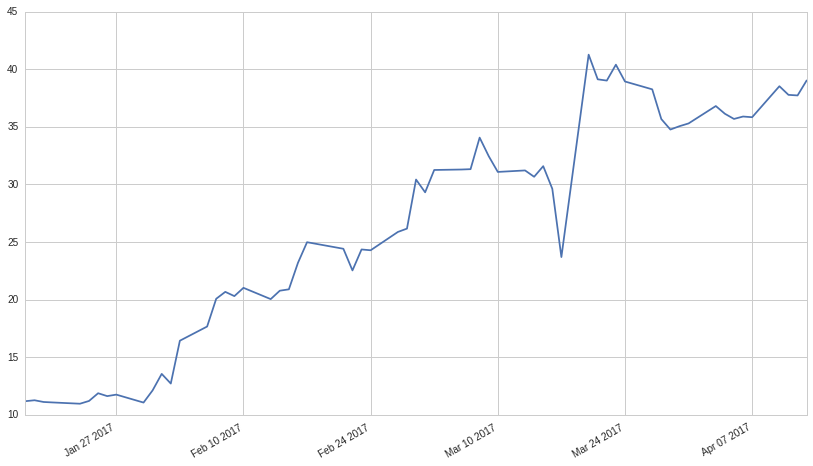

In [96]:
pricing[cr.idxmax(axis=1)[cr.idxmax(axis=1).shape[0]-1]].plot()

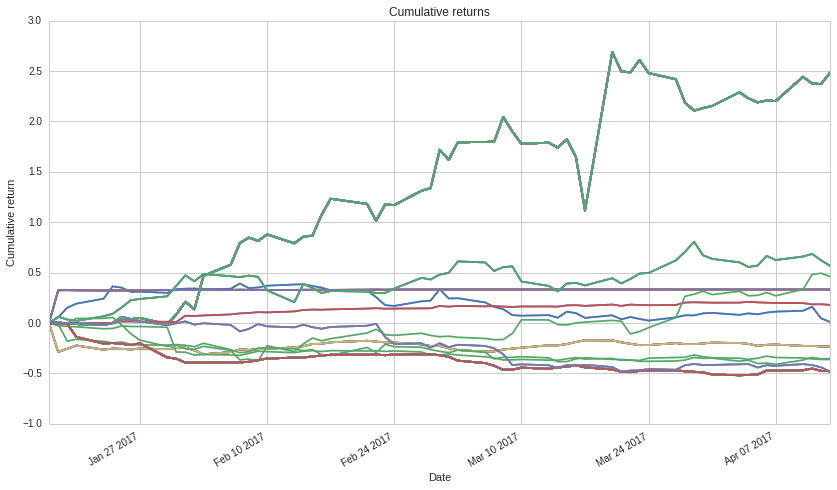

In [97]:
ax = cr[pd.concat([cr.idxmax(axis=1),cr.idxmin(axis=1)])].plot(title="Cumulative returns")
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative return")
ax.legend_.remove()
plt.show()

## Sharpe Ratio

In [112]:
sr = sharpe_ratio(compute_daily_returns((pricing)))
sr.fillna(0)
sr.head()

Equity(24 [AAPL])    4.376189
Equity(52 [ABM])     1.275075
Equity(53 [ABMD])    1.548339
Equity(62 [ABT])     1.722573
Equity(67 [ADSK])    1.560735
dtype: float64

In [113]:
sr = sr.sort_values(ascending=False)
sr.head()

Equity(6104 [FIZZ])    8.586846
Equity(35902 [PM])     7.342872
Equity(20277 [RAI])    6.694833
Equity(24608 [ENH])    6.004166
Equity(114 [ADBE])     5.904732
dtype: float64

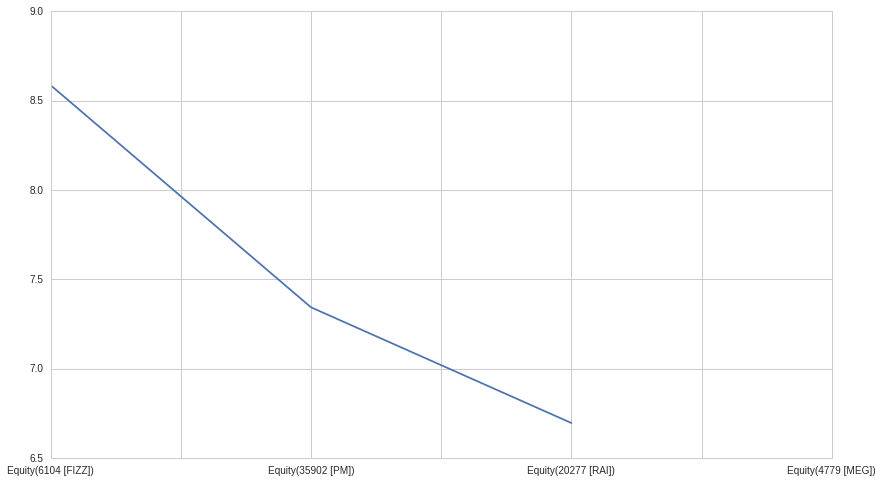

In [114]:
pd.concat([sr.head(3),sr.tail(1)]).plot()

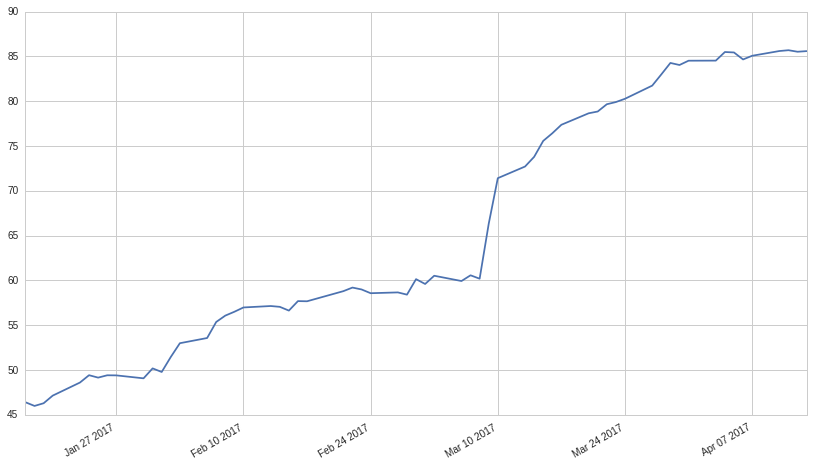

In [115]:
pricing[sr.index[0]].plot()

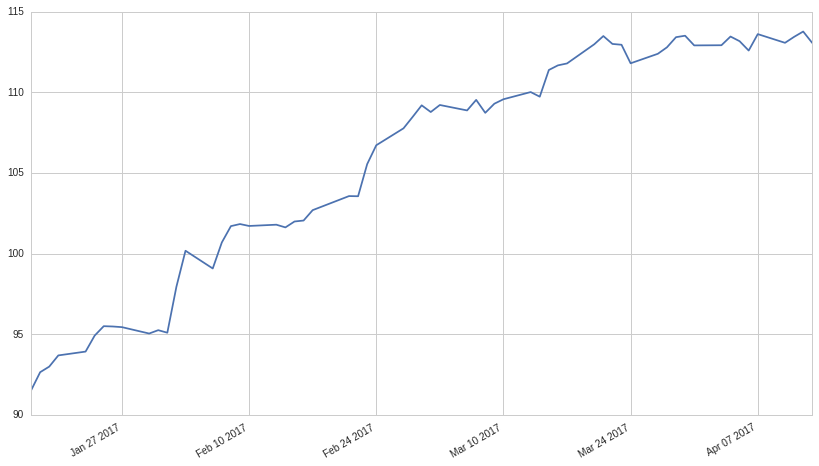

In [116]:
pricing[sr.index[1]].plot()

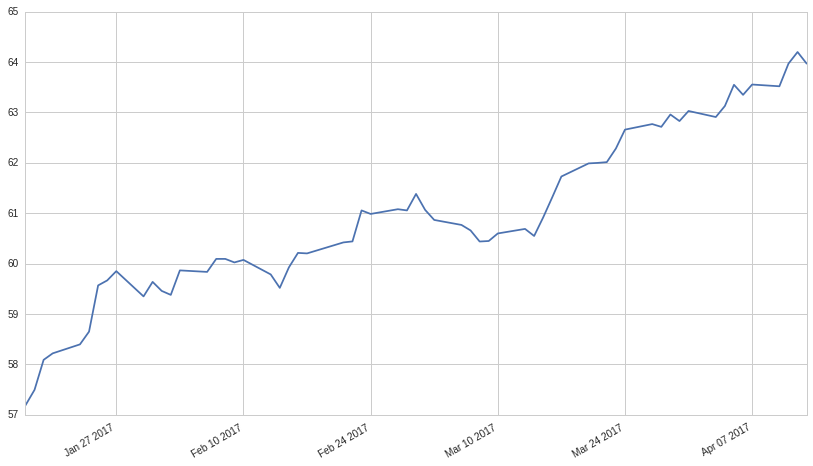

In [117]:
pricing[sr.index[2]].plot()

## Scatterplot Cumulative Return / Sharpe Ratio 

In [118]:
merge = pd.concat([sr,cr_last] , axis=1)
merge.columns = ['sharpe_ratio', 'cumulative_return']
merge.head()

,sharpe_ratio,cumulative_return
Equity(24 [AAPL]),4.376189,0.204372
Equity(52 [ABM]),1.275075,0.054295
Equity(53 [ABMD]),1.548339,0.091290
Equity(62 [ABT]),1.722573,0.048908
Equity(67 [ADSK]),1.560735,0.052242


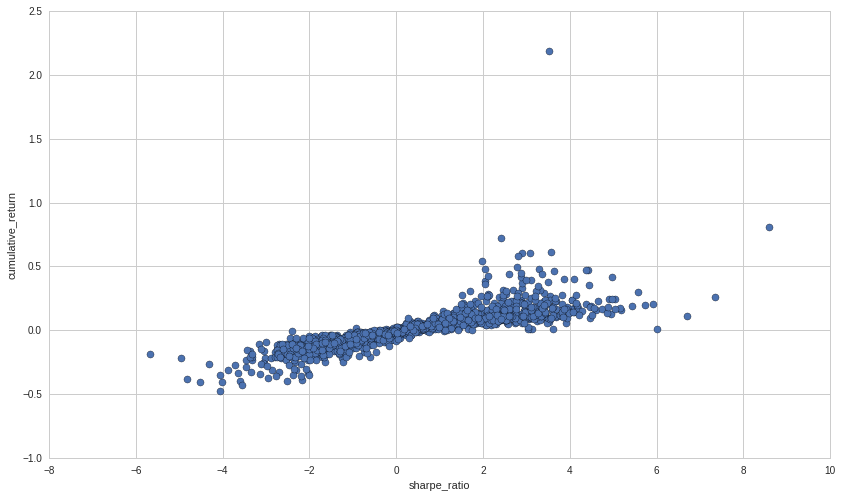

In [119]:
merge.plot(kind='scatter' , x='sharpe_ratio', y='cumulative_return' ,  s=50)

It can be observed a clear __correlation__ between sharpe_ratio and cumulative_return. 

In [136]:
merge['sharpe_ratio'].corr(merge['cumulative_return'])

0.80858462377989448

### Sort by Sharpe Ratio

In [120]:
merge.sort_values(by='sharpe_ratio',ascending=False).head(20)

,sharpe_ratio,cumulative_return
Equity(6104 [FIZZ]),8.586846,0.811092
Equity(35902 [PM]),7.342872,0.263655
Equity(20277 [RAI]),6.694833,0.111940
Equity(24608 [ENH]),6.004166,0.007345
Equity(114 [ADBE]),5.904732,0.202616
Equity(35081 [CIM]),5.721086,0.199110
Equity(34501 [MASI]),5.571165,0.299847
Equity(24760 [AMT]),5.428684,0.191123
Equity(734 [BAX]),5.188236,0.158187
Equity(4246 [KLAC]),5.162989,0.174434


In [124]:
sr.mean() , sr.std()

(0.5745739122853247, 1.8817158373461107)

### Sort by Cumulative Return 

In [121]:
merge.sort_values(by='cumulative_return',ascending=False).head(20)

,sharpe_ratio,cumulative_return
Equity(44989 [ESPR]),3.513027,2.192599
Equity(6104 [FIZZ]),8.586846,0.811092
Equity(45503 [AAOI]),2.403329,0.725511
Equity(47169 [KITE]),3.575196,0.613562
Equity(38633 [ASPS]),3.083891,0.606083
Equity(43599 [RH]),2.887282,0.603625
Equity(46283 [CARA]),2.794022,0.583916
Equity(26169 [SHLD]),1.966954,0.545349
Equity(27887 [CYNO]),2.778628,0.498297
Equity(46002 [NMBL]),2.045026,0.483373


In [125]:
cr_last.mean() , cr_last.std()

(0.022615203348375457, 0.14326363942627257)

__The second best security by cumulative return is the best security by sharpe ratio__. 
Is it good for long position? 

In [131]:
merge.sort_values(by='sharpe_ratio',ascending=False).index[0]

Equity(6104, symbol=u'FIZZ', asset_name=u'NATIONAL BEVERAGE CORP', exchange=u'NASDAQ', start_date=Timestamp('2002-01-01 00:00:00+0000', tz='UTC'), end_date=Timestamp('2017-04-17 00:00:00+0000', tz='UTC'), first_traded=None, auto_close_date=Timestamp('2017-04-20 00:00:00+0000', tz='UTC'), exchange_full=u'NASDAQ GLOBAL SELECT MARKET')

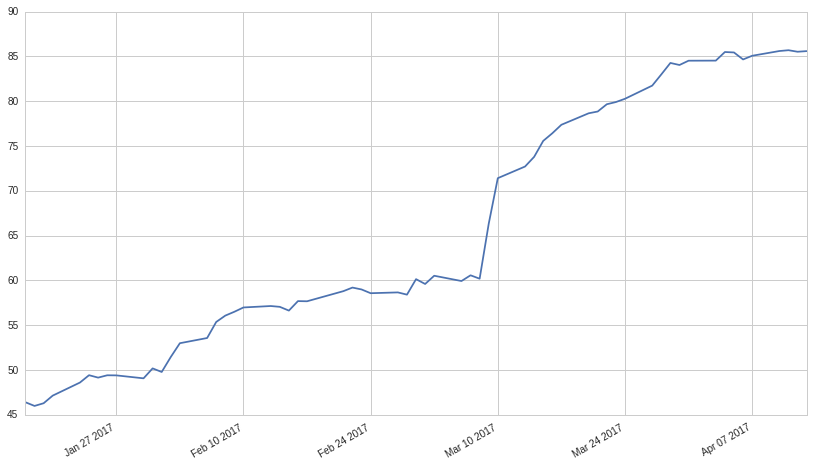

In [130]:
pricing[merge.sort_values(by='sharpe_ratio',ascending=False).index[0]].plot()

__Let's compare this with the best security by cumulative return__

In [132]:
merge.sort_values(by='cumulative_return',ascending=False).index[0]

Equity(44989, symbol=u'ESPR', asset_name=u'ESPERION THERAPEUTICS INC', exchange=u'NASDAQ', start_date=Timestamp('2013-06-25 00:00:00+0000', tz='UTC'), end_date=Timestamp('2017-04-17 00:00:00+0000', tz='UTC'), first_traded=None, auto_close_date=Timestamp('2017-04-20 00:00:00+0000', tz='UTC'), exchange_full=u'NASDAQ GLOBAL MARKET')

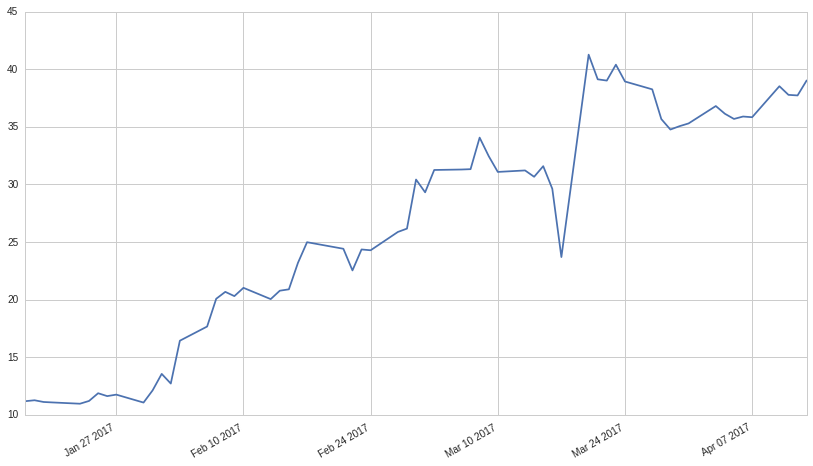

In [134]:
pricing[merge.sort_values(by='cumulative_return',ascending=False).index[0]].plot()

# 1 MONTH - Let's do the experiment 

In [141]:
DELTA = 30*2
DELTA_FROM = 30

In [147]:
start_date = (datetime.date.today() - datetime.timedelta(DELTA)).strftime("%m-%d-%Y")
print("start_date",start_date)

('start_date', '02-14-2017')


In [148]:
end_date = (datetime.date.today()).strftime("%m-%d-%Y")
print("end_date",end_date)

('end_date', '04-15-2017')


In [149]:
from_date = (datetime.date.today()- datetime.timedelta(DELTA_FROM)).strftime("%m-%d-%Y")
print("from_date",from_date)

('from_date', '03-16-2017')


In [150]:
def make_pipeline():
    universe = (Q1500US())
    pipe = Pipeline( screen = universe)
    return pipe

result = run_pipeline(pipeline=make_pipeline(),start_date=start_date,end_date=end_date)
result.head()

Empty DataFrame
Columns: []
Index: [(2017-02-14 00:00:00+00:00, Equity(24 [AAPL])), (2017-02-14 00:00:00+00:00, Equity(52 [ABM])), (2017-02-14 00:00:00+00:00, Equity(53 [ABMD])), (2017-02-14 00:00:00+00:00, Equity(62 [ABT])), (2017-02-14 00:00:00+00:00, Equity(67 [ADSK]))]

In [151]:
pricing = fill_missing_values(get_pricing(assets,start_date=start_date,end_date=end_date,fields='close_price'))

In [152]:
pricing.head()

,Equity(24 [AAPL]),Equity(52 [ABM]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),Equity(161 [AEP]),...,Equity(49760 [WBT]),Equity(49881 [LSXM_A]),Equity(49891 [MGP]),Equity(50138 [PI]),Equity(50181 [FHB]),Equity(50288 [TTD]),Equity(50357 [ARCH]),Equity(50533 [CNDT]),Equity(50535 [PK]),Equity(50595 [BIVV])
2017-02-14 00:00:00+00:00,135.010,40.178,108.890,43.395,84.54,99.062,117.58,77.407,43.405,63.27,...,19.21,35.92,25.257,34.720,32.124,30.330,68.55,15.11,27.107,44.52
2017-02-15 00:00:00+00:00,135.510,40.258,110.665,43.732,84.35,98.624,118.73,81.157,44.140,63.28,...,18.25,37.54,25.267,36.490,31.900,31.623,69.84,15.11,27.255,44.11
2017-02-16 00:00:00+00:00,135.345,40.706,114.260,43.931,85.15,99.391,118.93,81.535,44.100,63.69,...,18.63,37.96,25.218,35.310,31.950,33.490,72.07,15.10,27.255,44.10
2017-02-17 00:00:00+00:00,135.710,40.218,116.600,44.413,86.40,101.174,119.67,82.032,44.670,64.08,...,18.50,38.02,25.208,31.152,31.802,32.350,76.08,15.05,26.566,47.46
2017-02-21 00:00:00+00:00,136.690,40.657,117.850,44.736,87.15,100.108,119.63,82.370,44.800,64.76,...,19.41,38.92,25.198,28.800,31.845,34.940,73.99,15.09,26.463,48.19


In [154]:
assets = result.index.levels[1].unique()
print("# assets:",len(assets))

('# assets:', 1541)


In [163]:
mask_1 = pricing.index < from_date
mask_2 = pricing.index >= from_date 

In [166]:
pricing_1 = pricing[mask_1]
pricing_1.tail()

,Equity(24 [AAPL]),Equity(52 [ABM]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),Equity(161 [AEP]),...,Equity(49760 [WBT]),Equity(49881 [LSXM_A]),Equity(49891 [MGP]),Equity(50138 [PI]),Equity(50181 [FHB]),Equity(50288 [TTD]),Equity(50357 [ARCH]),Equity(50533 [CNDT]),Equity(50535 [PK]),Equity(50595 [BIVV])
2017-03-09 00:00:00+00:00,138.68,42.170,120.17,45.362,84.25,96.79,119.92,83.17,44.430,64.84,...,19.050,38.54,25.198,28.30,31.325,44.37,66.33,15.600,25.592,53.57
2017-03-10 00:00:00+00:00,139.15,43.117,121.20,45.452,86.12,97.10,121.09,82.20,45.050,65.44,...,18.949,38.52,25.356,27.96,31.250,45.79,64.76,15.640,25.602,52.99
2017-03-13 00:00:00+00:00,139.19,43.445,121.66,45.258,86.70,97.49,121.80,82.76,44.705,65.81,...,19.040,39.81,25.267,28.97,31.525,43.35,66.88,15.860,25.327,52.16
2017-03-14 00:00:00+00:00,138.98,43.326,120.51,44.538,85.90,97.10,121.43,83.68,44.680,65.79,...,19.070,39.71,25.110,28.02,31.470,41.20,65.68,15.970,25.356,51.43
2017-03-15 00:00:00+00:00,140.45,44.123,123.02,45.035,88.40,97.90,122.11,83.50,45.000,66.68,...,19.330,39.25,25.454,28.45,31.360,41.54,68.28,16.059,26.025,51.46


In [167]:
pricing_2 = pricing[mask_2]
pricing_2.head()

,Equity(24 [AAPL]),Equity(52 [ABM]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),Equity(161 [AEP]),...,Equity(49760 [WBT]),Equity(49881 [LSXM_A]),Equity(49891 [MGP]),Equity(50138 [PI]),Equity(50181 [FHB]),Equity(50288 [TTD]),Equity(50357 [ARCH]),Equity(50533 [CNDT]),Equity(50535 [PK]),Equity(50595 [BIVV])
2017-03-16 00:00:00+00:00,140.69,44.242,122.94,44.702,86.73,98.22,122.36,82.72,44.850,66.020,...,19.27,39.23,25.425,28.53,31.39,40.17,67.93,15.770,26.128,50.700
2017-03-17 00:00:00+00:00,139.91,44.382,123.94,44.920,86.22,98.38,127.00,83.25,44.710,66.475,...,19.24,39.57,25.947,28.72,31.24,39.52,67.00,15.740,26.197,49.370
2017-03-20 00:00:00+00:00,141.48,43.854,123.54,44.716,86.31,98.64,126.33,82.90,44.860,66.140,...,19.42,39.47,25.760,28.80,30.82,38.08,66.06,16.020,26.005,49.170
2017-03-21 00:00:00+00:00,139.85,43.256,122.22,44.528,83.63,98.02,125.06,81.81,44.955,66.980,...,19.17,38.81,25.553,28.69,29.66,37.55,65.56,15.960,25.730,48.985
2017-03-22 00:00:00+00:00,141.43,43.122,123.44,44.538,84.61,97.52,126.21,82.13,45.620,67.445,...,19.06,38.19,25.701,28.11,29.38,38.64,67.00,16.045,25.750,51.310


## Cumulative returns and Sharpe Ratio

In [189]:
# 1 month
cr1 = cumulative_returns(pricing_1)
cr1 = cr1.fillna(value=0)
cr1 = cr1.sort_index()

sr1 = sharpe_ratio(compute_daily_returns((pricing_1)))
sr1 = sr1.fillna(0)
sr1 = sr1.sort_values(ascending=False)

# 2 month 
cr2 = cumulative_returns(pricing_2)
cr2 = cr2.fillna(value=0)
cr2 = cr2.sort_index()

sr2 = sharpe_ratio(compute_daily_returns((pricing_2)))
sr2 = sr1.fillna(0)
sr2 = sr2.sort_values(ascending=False)

### Securities picked 

In [190]:
cr1.ix[ (cr1.shape[0]-1) ,:].sort_values(ascending=False).head(10)

Equity(47169 [KITE])    0.532649
Equity(44989 [ESPR])    0.520212
Equity(21608 [CYH])     0.445619
Equity(46002 [NMBL])    0.402910
Equity(50288 [TTD])     0.369601
Equity(44770 [PTLA])    0.349290
Equity(47430 [MBLY])    0.338172
Equity(6104 [FIZZ])     0.324571
Equity(43599 [RH])      0.315967
Equity(45503 [AAOI])    0.302172
Name: 2017-03-15 00:00:00+00:00, dtype: float64

In [192]:
sr1.head(10)

Equity(34501 [MASI])    14.960075
Equity(4151 [JNJ])      12.712102
Equity(24608 [ENH])     12.423599
Equity(35902 [PM])      10.963391
Equity(7904 [VAR])      10.381566
Equity(4954 [MO])        9.974175
Equity(3810 [IDXX])      9.838614
Equity(8414 [HRG])       9.800078
Equity(3629 [HOLX])      9.545210
Equity(43694 [ABBV])     9.300756
dtype: float64

In [178]:
cr1.ix[ (cr1.shape[0]-1) ,:].sort_values(ascending=False).tail(10)

Equity(46949 [DNOW])   -0.254521
Equity(2069 [FTR])     -0.255220
Equity(20866 [FNSR])   -0.262559
Equity(25565 [ANIP])   -0.265720
Equity(33236 [EXK])    -0.272727
Equity(8816 [FOSL])    -0.276126
Equity(15789 [DNR])    -0.298851
Equity(37849 [IPXL])   -0.340426
Equity(7203 [TLRD])    -0.341790
Equity(47848 [FMSA])   -0.406326
Name: 2017-03-15 00:00:00+00:00, dtype: float64

In [193]:
sr1.tail(10)

Equity(1062 [BPOP])    -7.626686
Equity(41462 [MOS])    -7.915294
Equity(17787 [YUM])    -8.244600
Equity(45248 [FI])     -8.515711
Equity(28116 [GPOR])   -8.620919
Equity(32234 [SNCR])   -8.673624
Equity(5645 [BRS])     -9.003197
Equity(33979 [INFN])   -9.179343
Equity(27558 [CF])     -9.265618
Equity(46949 [DNOW])   -9.531488
dtype: float64

In [238]:
pick_stock = set([item for sub in [cr1.ix[(cr1.shape[0]-1) ,:].sort_values(ascending=False).head(10).index.values.tolist(),
    cr1.ix[ (cr1.shape[0]-1) ,:].sort_values(ascending=False).tail(10).index.values.tolist(),
    sr1.head(10).index.values.tolist(),
    sr1.tail(10).index.values.tolist()] for item in sub])
           
len(pick_stock)

39

### Best/Worst performance the next month

In [181]:
cr2.ix[ (cr2.shape[0]-1) ,:].sort_values(ascending=False).head(10)

Equity(38633 [ASPS])    0.490361
Equity(26169 [SHLD])    0.456983
Equity(270 [AKRX])      0.421122
Equity(37849 [IPXL])    0.390625
Equity(20133 [PNRA])    0.338311
Equity(44989 [ESPR])    0.317424
Equity(43599 [RH])      0.299613
Equity(8045 [VRTX])     0.232402
Equity(1374 [CDE])      0.223676
Equity(32819 [GSAT])    0.211268
Name: 2017-04-13 00:00:00+00:00, dtype: float64

In [182]:
cr2.ix[ (cr2.shape[0]-1) ,:].sort_values(ascending=False).tail(10)

Equity(8329 [X])       -0.210865
Equity(42166 [CLVS])   -0.211781
Equity(22192 [ARRY])   -0.213953
Equity(10897 [AKS])    -0.226667
Equity(2069 [FTR])     -0.227092
Equity(1595 [CLF])     -0.237687
Equity(17908 [PGNX])   -0.262238
Equity(32871 [AFSI])   -0.272893
Equity(46285 [RARE])   -0.295314
Equity(28077 [ACOR])   -0.394404
Name: 2017-04-13 00:00:00+00:00, dtype: float64

In [241]:
top_stock = set([item for sub in [cr2.ix[ (cr2.shape[0]-1) ,:].sort_values(ascending=False).head(10).index.values.tolist(), 
cr2.ix[ (cr2.shape[0]-1) ,:].sort_values(ascending=False).tail(10).index.values.tolist()] for item in sub])
len(top_stock)

20

### How many picked stocks are in the final list?

In [243]:
len(top_stock.intersection(pick_stock))

4

In [246]:
np.float32(len(top_stock.intersection(pick_stock))) / np.float32(len(top_stock))

0.2

__The interesting thing is that these 4 picked stocks in final list don't come from the sharpe ratio list as 
expected but they come from the cumulative return list__. 

* FTR - NO - Equity(2069 [FTR])     -0.255220
* IPXL - NO - Equity(37849 [IPXL])   -0.340426
* RH - NO - Equity(43599 [RH])      0.315967
* ESPR - NO - Equity(44989 [ESPR])    0.520212

### What are the cumulative return of top picked stocks (long positions)

In [268]:
cr = cumulative_returns(pricing_2[list(pick_stock)])
cr = cr.fillna(value=0)
cr = cr.sort_index()
crn = cr[-1:]
crn

,Equity(20866 [FNSR]),Equity(5645 [BRS]),Equity(3629 [HOLX]),Equity(2069 [FTR]),Equity(24608 [ENH]),Equity(8816 [FOSL]),Equity(7203 [TLRD]),Equity(1062 [BPOP]),Equity(15789 [DNR]),Equity(43694 [ABBV]),...,Equity(7904 [VAR]),Equity(44770 [PTLA]),Equity(46949 [DNOW]),Equity(21608 [CYH]),Equity(32234 [SNCR]),Equity(50288 [TTD]),Equity(47848 [FMSA]),Equity(41462 [MOS]),Equity(28116 [GPOR]),Equity(17787 [YUM])
2017-04-13 00:00:00+00:00,-0.101752,0.017316,-0.001882,-0.227092,0.001023,0.002985,-0.196311,-0.059541,-0.012712,-0.016873,...,-0.01179,-0.054242,-0.008636,-0.034995,-0.102359,-0.082898,-0.100485,-0.051932,-0.057109,0.003605


In [269]:
crn.mean(axis=1)

2017-04-13 00:00:00+00:00   -0.00382
Freq: C, dtype: float64

__This concludes the evaluation of such picking strategy: not only best stocks are not picked but the cumulative 
    return of picked stocks is on average bad__

And just to cry without doubts, we switch from a situation like this 

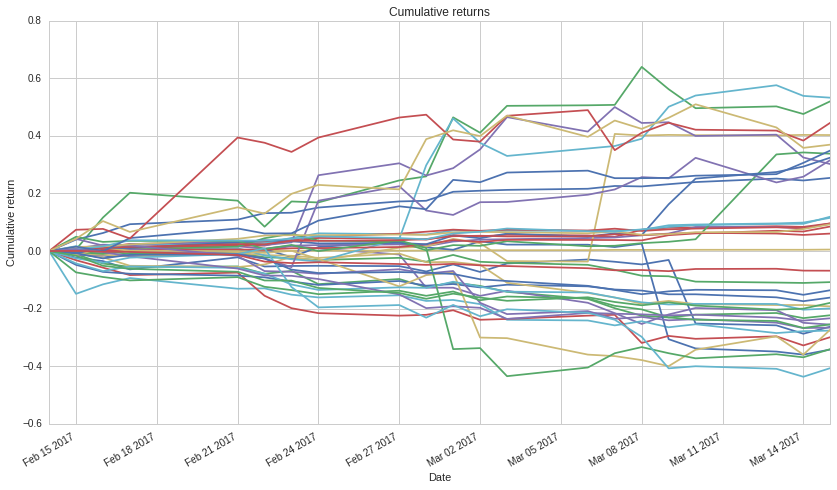

In [272]:
cr0 = cumulative_returns(pricing_1[list(pick_stock)])
cr0 = cr0.fillna(value=0)
cr0 = cr0.sort_index()
ax = cr0.plot(title="Cumulative returns")
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative return")
ax.legend_.remove()
plt.show()

to a situation like this 

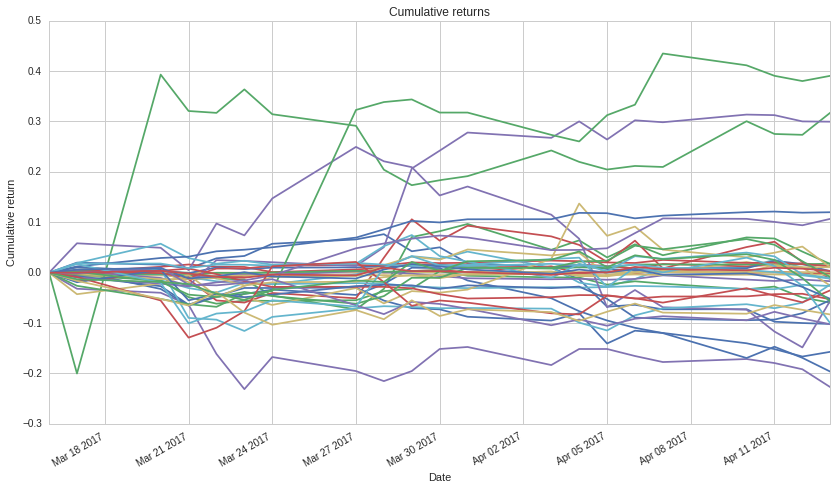

In [273]:
ax = cr.plot(title="Cumulative returns")
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative return")
ax.legend_.remove()
plt.show()